# Handwritten Number Classifier with Camera Input
### Using TensorFlow and OpenCV for Real-time Digit Detection

In [ ]:
%pip install tensorflow opencv-python numpy matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
# ============================================
# CELL 1: LIBRARY IMPORTS
# ============================================
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline
print('Libraries loaded successfully!')

Libraries loaded successfully!


In [31]:
# ============================================
# CELL 2: GPU MEMORY CONFIGURATION
# ============================================
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")

if len(gpu_device) > 0:
    tf.config.experimental.set_memory_growth(gpu_device[0], True)
    print('GPU memory growth enabled')

Number of GPU = 0


In [32]:
# ============================================
# CELL 3: DATASET LOADING
# ============================================
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


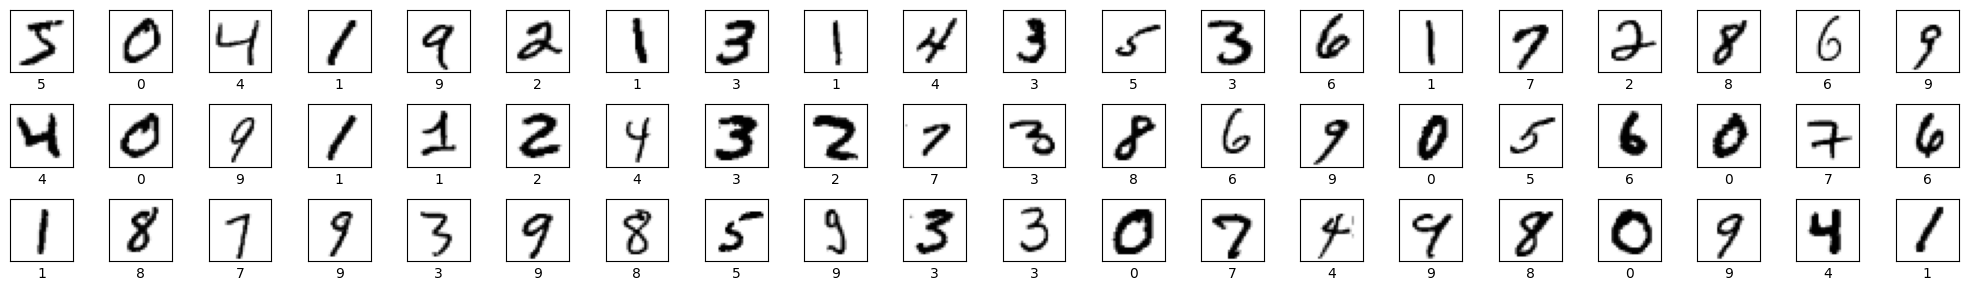

In [33]:
# ============================================
# CELL 4: SAMPLE VISUALIZATION
# ============================================
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

In [34]:
# ============================================
# CELL 5: DATA NORMALIZATION
# ============================================
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0
print('Data normalized: pixel values scaled to [0, 1]')

Data normalized: pixel values scaled to [0, 1]


In [35]:
# ============================================
# CELL 6: MODEL ARCHITECTURE
# ============================================
model = keras.Sequential([
    keras.Input(shape=(28 * 28,)),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# ============================================
# CELL 7: COMPILE MODEL
# ============================================
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
print('Model compiled with Adam optimizer')

Model compiled with Adam optimizer


In [37]:
# ============================================
# CELL 8: TRAINING
# ============================================
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9200 - loss: 0.2717 - val_accuracy: 0.9490 - val_loss: 0.1637
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9685 - loss: 0.1039 - val_accuracy: 0.9663 - val_loss: 0.1152
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9796 - loss: 0.0674 - val_accuracy: 0.9697 - val_loss: 0.1025
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9850 - loss: 0.0476 - val_accuracy: 0.9702 - val_loss: 0.1033
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9896 - loss: 0.0321 - val_accuracy: 0.9726 - val_loss: 0.0974


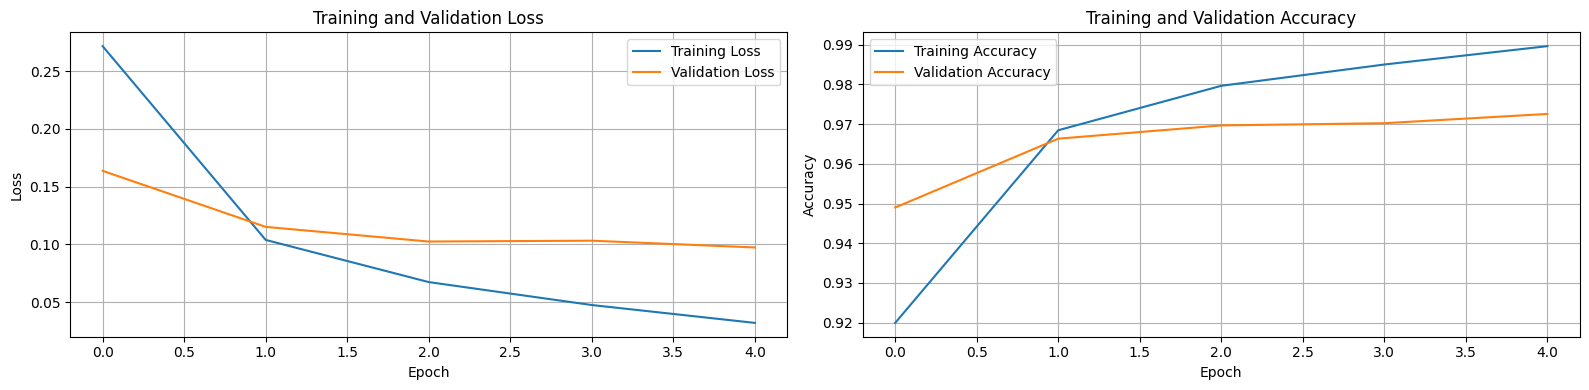

In [38]:
# ============================================
# CELL 9: TRAINING VISUALIZATION
# ============================================
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Plot loss
axes[0].plot(h.history['loss'], label='Training Loss')
axes[0].plot(h.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].legend()
axes[0].grid(True)

# Plot accuracy
axes[1].plot(h.history['accuracy'], label='Training Accuracy')
axes[1].plot(h.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training and Validation Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [39]:
# ============================================
# CELL 10: MODEL EVALUATION
# ============================================
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9779 - loss: 0.0796  


[0.07961852103471756, 0.9779000282287598]

---
## PART 2: CAMERA-BASED DIGIT RECOGNITION

**Different approach using helper functions and Otsu thresholding**

| Feature | Implementation |
|---------|----------------|
| Threshold | Otsu's automatic |
| Preprocessing | Morphological operations |
| Box Position | Bottom-right corner |
| Box Style | Cyan dashed-look |

In [40]:
# ============================================
# CELL 11: HELPER FUNCTIONS
# ============================================

def convertToGrayscale(imgInput):
    """Convert BGR image to grayscale"""
    return cv2.cvtColor(imgInput, cv2.COLOR_BGR2GRAY)

def applyBlur(grayImg, kernelSize=7):
    """Apply Gaussian blur to reduce noise"""
    return cv2.GaussianBlur(grayImg, (kernelSize, kernelSize), 0)

def applyOtsuThreshold(blurredImg):
    """Apply Otsu's automatic thresholding"""
    _, binaryImg = cv2.threshold(blurredImg, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return binaryImg

def applyMorphology(binaryImg):
    """Apply morphological operations to clean up"""
    kernelOpen = np.ones((3, 3), np.uint8)
    kernelClose = np.ones((5, 5), np.uint8)
    
    # Opening removes small noise
    opened = cv2.morphologyEx(binaryImg, cv2.MORPH_OPEN, kernelOpen, iterations=1)
    # Closing fills small holes
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernelClose, iterations=1)
    
    return closed

def findLargestContour(binaryImg, minArea=800):
    """Find the largest contour that meets minimum area requirement"""
    contourList, _ = cv2.findContours(binaryImg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contourList) == 0:
        return None
    
    biggestContour = max(contourList, key=cv2.contourArea)
    
    if cv2.contourArea(biggestContour) < minArea:
        return None
    
    return biggestContour

def getFlexibleBoxPosition(contour, boxSize, frameWidth, frameHeight):
    """Calculate box position centered around detected digit"""
    rectX, rectY, rectW, rectH = cv2.boundingRect(contour)
    
    # Center of the detected digit
    digitCenterX = rectX + rectW // 2
    digitCenterY = rectY + rectH // 2
    
    # Position box centered on digit
    boxStartX = digitCenterX - boxSize // 2
    boxStartY = digitCenterY - boxSize // 2
    
    # Keep box within frame boundaries
    boxStartX = max(0, min(boxStartX, frameWidth - boxSize))
    boxStartY = max(0, min(boxStartY, frameHeight - boxSize))
    
    return boxStartX, boxStartY

def prepareDigitForPrediction(binaryImg, contour):
    """Extract digit, center it, and resize to 28x28"""
    rectX, rectY, rectW, rectH = cv2.boundingRect(contour)
    digitCrop = binaryImg[rectY:rectY+rectH, rectX:rectX+rectW]
    
    # Make square canvas
    maxDim = max(rectW, rectH)
    squareCanvas = np.zeros((maxDim, maxDim), dtype=np.uint8)
    
    # Center the digit
    xOffset = (maxDim - rectW) // 2
    yOffset = (maxDim - rectH) // 2
    squareCanvas[yOffset:yOffset+rectH, xOffset:xOffset+rectW] = digitCrop
    
    # Add padding
    paddedImg = cv2.copyMakeBorder(squareCanvas, 15, 15, 15, 15, cv2.BORDER_CONSTANT, value=0)
    
    # Resize to MNIST size
    resizedImg = cv2.resize(paddedImg, (28, 28), interpolation=cv2.INTER_AREA)
    
    return resizedImg

def predictDigit(digitImg, neuralNetModel):
    """Normalize and predict using the model"""
    normalizedImg = digitImg.astype('float32') / 255.0
    flattenedImg = normalizedImg.reshape(1, 784)
    
    predictionResult = neuralNetModel.predict(flattenedImg, verbose=0)
    predictedClass = np.argmax(predictionResult)
    confidenceScore = np.max(predictionResult) * 100
    
    return predictedClass, confidenceScore

def drawDetectionBox(frameImg, startX, startY, boxSize, color, thickness=2):
    """Draw detection box with corner marks"""
    endX = startX + boxSize
    endY = startY + boxSize
    cornerLen = 20
    
    # Top-left corner
    cv2.line(frameImg, (startX, startY), (startX + cornerLen, startY), color, thickness)
    cv2.line(frameImg, (startX, startY), (startX, startY + cornerLen), color, thickness)
    
    # Top-right corner
    cv2.line(frameImg, (endX, startY), (endX - cornerLen, startY), color, thickness)
    cv2.line(frameImg, (endX, startY), (endX, startY + cornerLen), color, thickness)
    
    # Bottom-left corner
    cv2.line(frameImg, (startX, endY), (startX + cornerLen, endY), color, thickness)
    cv2.line(frameImg, (startX, endY), (startX, endY - cornerLen), color, thickness)
    
    # Bottom-right corner
    cv2.line(frameImg, (endX, endY), (endX - cornerLen, endY), color, thickness)
    cv2.line(frameImg, (endX, endY), (endX, endY - cornerLen), color, thickness)

print('Helper functions defined!')

Helper functions defined!


In [ ]:
# ============================================
# CELL 12: WEBCAM DIGIT RECOGNITION MAIN LOOP
# ============================================

# --- Configuration ---
DETECTION_BOX_SIZE = 160
CYAN_COLOR = (255, 255, 0)
MAGENTA_COLOR = (255, 0, 255)
WHITE_COLOR = (255, 255, 255)
DEFAULT_BOX_X = 420  # Fallback position
DEFAULT_BOX_Y = 280  # Fallback position

# --- Initialize Video Capture ---
videoCapture = cv2.VideoCapture('http://192.168.0.221:4747/video')

if not videoCapture.isOpened():
    print('ERROR: Cannot connect to IP camera!')
    print('Make sure DroidCam is running and the URL is correct: http://192.168.0.221:4747/')
else:
    print('IP Camera connected successfully')
    print('Press [Q] to quit')

# --- Main Processing Loop ---
while videoCapture.isOpened():
    
    isSuccess, currentFrame = videoCapture.read()
    
    if not isSuccess:
        print('Frame capture failed')
        break
    
    frameHeight, frameWidth = currentFrame.shape[:2]
    
    # Process full frame to detect digit
    grayFrameFull = convertToGrayscale(currentFrame)
    blurredFrameFull = applyBlur(grayFrameFull, 5)
    binaryFrameFull = applyOtsuThreshold(blurredFrameFull)
    cleanedFrameFull = applyMorphology(binaryFrameFull)
    
    # Find digit contour in full frame
    detectedContourFull = findLargestContour(cleanedFrameFull)
    
    # Calculate flexible box position based on detected digit
    if detectedContourFull is not None:
        BOX_START_X, BOX_START_Y = getFlexibleBoxPosition(
            detectedContourFull, DETECTION_BOX_SIZE, frameWidth, frameHeight
        )
    else:
        # Fallback to default position if no digit detected
        BOX_START_X = DEFAULT_BOX_X
        BOX_START_Y = DEFAULT_BOX_Y
    
    # Extract ROI from flexible position
    roiEndX = BOX_START_X + DETECTION_BOX_SIZE
    roiEndY = BOX_START_Y + DETECTION_BOX_SIZE
    regionOfInterest = currentFrame[BOX_START_Y:roiEndY, BOX_START_X:roiEndX]
    
    # Image processing pipeline for ROI
    grayImage = convertToGrayscale(regionOfInterest)
    blurredImage = applyBlur(grayImage, 5)
    binaryImage = applyOtsuThreshold(blurredImage)
    cleanedImage = applyMorphology(binaryImage)
    
    # Find digit contour in ROI
    detectedContour = findLargestContour(cleanedImage)
    
    if detectedContour is not None:
        # Prepare and predict
        processedDigit = prepareDigitForPrediction(cleanedImage, detectedContour)
        digitClass, confidencePercent = predictDigit(processedDigit, model)
        
        # Display result
        resultText = f"{digitClass}"
        confText = f"Conf: {confidencePercent:.0f}%"
        
        cv2.putText(currentFrame, resultText, (BOX_START_X + 50, BOX_START_Y + 50), 
                    cv2.FONT_HERSHEY_TRIPLEX, 1.8, MAGENTA_COLOR, 2)
        cv2.putText(currentFrame, confText, (BOX_START_X + 30, BOX_START_Y + 90), 
                    cv2.FONT_HERSHEY_PLAIN, 1.2, MAGENTA_COLOR, 1)
        
        # Preview window
        digitPreview = cv2.resize(processedDigit, (80, 80))
        cv2.imshow('Digit Preview', digitPreview)
    
    # Draw detection box with corners (now at flexible position)
    drawDetectionBox(currentFrame, BOX_START_X, BOX_START_Y, DETECTION_BOX_SIZE, CYAN_COLOR, 3)
    
    # Instructions
    cv2.putText(currentFrame, 'Write digit here', (BOX_START_X - 10, BOX_START_Y - 10), 
                cv2.FONT_HERSHEY_PLAIN, 1.2, CYAN_COLOR, 1)
    cv2.putText(currentFrame, '[Q] Quit', (10, 30), 
                cv2.FONT_HERSHEY_PLAIN, 1.5, WHITE_COLOR, 1)
    
    # Show windows
    cv2.imshow('Number Recognition System', currentFrame)
    cv2.imshow('Processed Binary', cleanedImage)
    
    # Key handling
    keyPressed = cv2.waitKey(1) & 0xFF
    
    if keyPressed == ord('q') or keyPressed == ord('Q'):
        print('Exiting...')
        break

IP Camera connected successfully
Press [Q] to quit
Exiting...


: 

In [2]:
# ============================================
# CELL 13: CLEANUP RESOURCES
# ============================================
videoCapture.release()
cv2.destroyAllWindows()
print('Resources released successfully!')

NameError: name 'videoCapture' is not defined